In [1]:
import tensorflow as tf

In [2]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
import numpy as np

In [4]:
import pandas as pd

In [5]:
import matplotlib.pyplot as plt

In [6]:
import seaborn as sns

In [7]:
# from tensorflow.keras.layers import Dense
from tensorflow import keras

# 단변량 입력

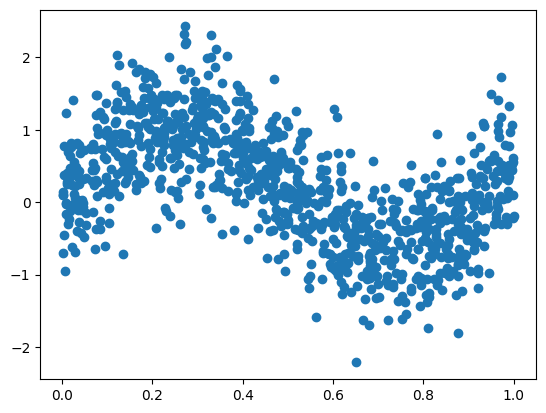

In [8]:
data_loc = 'https://github.com/dknife/ML/raw/main/data/'
df = pd.read_csv(data_loc+'nonlinear.csv')
X = df['x'].to_numpy()
y_label = df['y'].to_numpy()

plt.figure()
plt.scatter(X, y_label)
plt.show()

# 회귀에서 출력 활성화 함수는 linear해야 함

* 전연결층 / 덴스 계층 / FNC / affine layer 어파인 계층 / 덴스는 별칭같은 느낌(공식문서에서는 안 씀)

* 노드의 개수와 output의 개수가 똑같음
* 여기에서의 None은 모른다의 뜻(데이터의 개수)

# 모델 생성

In [9]:
# 거의 쓰지 않는 문법
# 모델의 구조
model = keras.models.Sequential([
    keras.layers.Input(shape=(1,)),
    keras.layers.Dense(6, activation='sigmoid'),
    keras.layers.Dense(4, activation='sigmoid'),
    keras.layers.Dense(1)
])

# 모델 가중치, SGD(확률적 경사 하강법)
optimizer = keras.optimizers.SGD(learning_rate=0.5)
model.compile(optimizer=optimizer, loss='mse')
# summary()는 항상 확인해야 함 !꼭!
model.summary()

# 6은 1x6에서 나머지 6개는 편향, 4는 6x4에서 나머지 4개는 편향, 1은 4x1에서 나머지 1개는 편향

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 12        
                                                                 
 dense_1 (Dense)             (None, 4)                 28        
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 45
Trainable params: 45
Non-trainable params: 0
_________________________________________________________________


# 모델 학습

In [10]:
model.fit(X, y_label, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 1ms/step - loss: 0.7567
Epoch 2/100
32/32 [==============================] - 0s 949us/step - loss: 0.7149
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6760
Epoch 4/100
32/32 [==============================] - 0s 957us/step - loss: 0.6647
Epoch 5/100
32/32 [==============================] - 0s 919us/step - loss: 0.6319
Epoch 6/100
32/32 [==============================] - 0s 974us/step - loss: 0.6227
Epoch 7/100
32/32 [==============================] - 0s 896us/step - loss: 0.6245
Epoch 8/100
32/32 [==============================] - 0s 955us/step - loss: 0.6004
Epoch 9/100
32/32 [==============================] - 0s 935us/step - loss: 0.5872
Epoch 10/100
32/32 [==============================] - 0s 925us/step - loss: 0.6468
Epoch 11/100
32/32 [==============================] - 0s 915us/step - loss: 0.5396
Epoch 12/100
32/32 [==============================] - 0s 912us/step - loss: 0.4999
Epoch 13/100
32/3

In [11]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

4/4 [==============================] - 0s 1000us/step


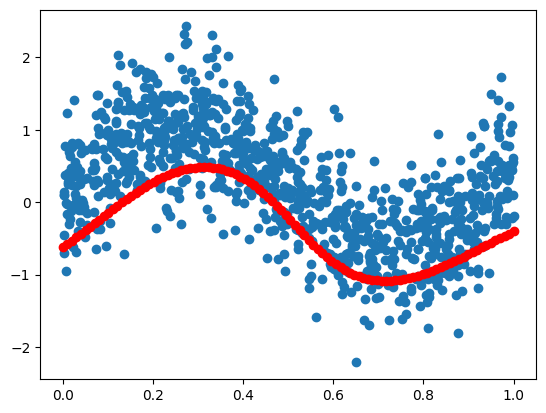

In [12]:
domain = np.linspace(0, 1, 100).reshape(-1, 1)
y_hat = model.predict(domain)
plt.figure()
plt.scatter(X, y_label)
plt.scatter(domain, y_hat, color='r') # 모델의 예측 결과
plt.show()

In [13]:
from tensorflow.keras.layers import Input, Dense
# import tensorflow.keras.Model as Model
from tensorflow.keras import Model

# 아래의 문법을 자주 씀 / 자유로움 / 복잡하지 않음 / 연결관계가 명확함
inputs = Input(shape=(1,))
x = Dense(6, activation='sigmoid')(inputs)
x = Dense(4, activation='sigmoid')(x) # 은닉층들은 그냥 덮어써버림
outputs = Dense(1)(x)
model = Model(inputs=inputs, outputs=outputs)

# 모델 가중치, SGD(확률적 경사 하강법)
optimizer = keras.optimizers.SGD(learning_rate=0.5)
model.compile(optimizer=optimizer, loss='mse')
# summary()는 항상 확인해야 함 !꼭!
model.summary()

# 6은 1x6에서 나머지 6개는 편향, 4는 6x4에서 나머지 4개는 편향, 1은 4x1에서 나머지 1개는 편향

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 dense_3 (Dense)             (None, 6)                 12        
                                                                 
 dense_4 (Dense)             (None, 4)                 28        
                                                                 
 dense_5 (Dense)             (None, 1)                 5         
                                                                 
Total params: 45
Trainable params: 45
Non-trainable params: 0
_________________________________________________________________
